<a href="https://colab.research.google.com/github/IamJac/MachineLearningAlgorithms/blob/main/finalmnist001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


REQUIRED IMPORTS

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

LOADING THE DATA INTO A DATAFRAME

In [ ]:
train=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

EXPLORATORY DATA ANALYSIS

In [ ]:
print(f"Train data's shape={train.shape}\nTest data's shape={test.shape}")

Train data's shape=(42000, 785)
Test data's shape=(28000, 784)


In [ ]:
#A look at the training data
train.loc[50:55]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
50,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

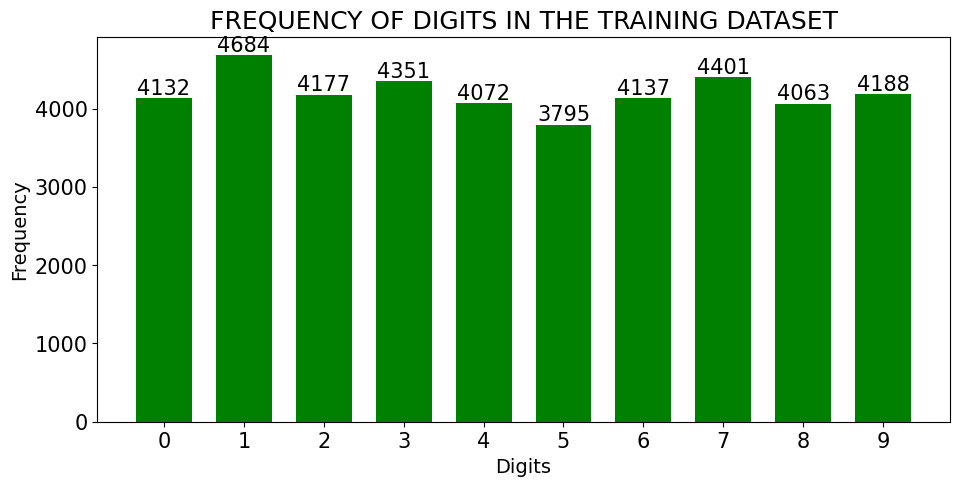

In [ ]:
import matplotlib.pyplot as plt
counts=train.groupby('label')['label'].count()
plotter=plt.figure(figsize=(11,5))
plotter.add_subplot(111)
plt.bar(counts.index,counts.values,width=0.7,color='green')
for j in counts.index:
    plt.text(j,counts.values[j]+50,str(counts.values[j]),horizontalalignment='center',fontsize=15)
plt.tick_params(labelsize=15)
plt.xticks(counts.index)
plt.xlabel('Digits',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('FREQUENCY OF DIGITS IN THE TRAINING DATASET',fontsize=18)
plt.show


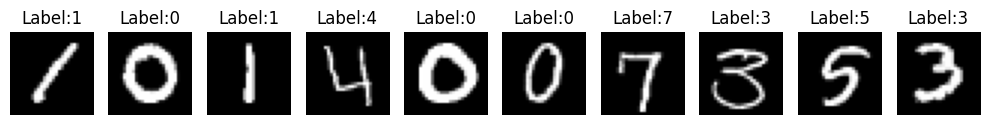

In [ ]:
data1=train.drop(columns=['label']).values
data2=train['label'].values
data1=data1.reshape(-1,28,28)
data1=data1/255.0
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(data1[i],cmap='gray')
    plt.title(f"Label:{data2[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

DATA PREPROCESSING

In [ ]:
X_train=train.drop('label',axis=1).values
y_train=train['label'].values

In [ ]:
#Normalizing the pixel values to the range [0,1]
X_train=X_train/255.0
test=test/255.0

In [ ]:
X_train=X_train.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

In [ ]:
print(f'Test shape={test.shape} \nX_train shape={X_train.shape} \ny_train shape={y_train.shape}')

Test shape=(28000, 28, 28, 1) 
X_train shape=(42000, 28, 28, 1) 
y_train shape=(42000,)


In [ ]:
y_train=to_categorical(y_train,num_classes=10)
print(y_train[2])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=42)
print(f'X_train shape={X_train.shape}')
print(f'y_train shape={y_train.shape}')
print(f'X_val shape={X_val.shape}')
print(f'y_val shape={y_val.shape}')

X_train shape=(33600, 28, 28, 1)
y_train shape=(33600, 10)
X_val shape=(8400, 28, 28, 1)
y_val shape=(8400, 10)


In [ ]:
#from tensorflow.keras.regularizers import L2
model=Sequential([Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
                  MaxPooling2D((2,2)),

                  Dropout(rate=0.5),

                  Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                  MaxPooling2D((2,2)),

                  Dropout(rate=0.3),
                  Flatten(),

                  Dense(units=512,activation='relu'),

                  Dropout(rate=0.5),
                  Dense(units=256,activation='relu'),


                  Dropout(rate=0.5),
                  Dense(units=128,activation='relu'),

                  Dropout(rate=0.5),
                  Dense(units=64,activation='relu'),

                  Dropout(rate=0.5),
                  Dense(units=10,activation='softmax')
                 ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam
optm=Adam(learning_rate=0.001)
model.compile(optimizer=optm,
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopper=EarlyStopping(monitor='val_loss',patience=30,restore_best_weights=True,min_delta=0.001,mode='min')

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=500,batch_size=4096,callbacks=[earlystopper],verbose=0)

In [ ]:
val_loss,val_accuracy=model.evaluate(X_val,y_val)
print(f'Validation accuracy={val_accuracy}')

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9927 - loss: 0.0349
Validation accuracy=0.9932143092155457


In [ ]:
def plot_training_visualisation(history):
    plt.figure(figsize=(20,12))

    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'],label="Training Accuracy")
    plt.plot(history.history['val_accuracy'],label="Validation Accuracy")
    plt.title("Model Accuracy")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'],label="Training Loss")
    plt.plot(history.history['val_loss'],label="Validation Loss")
    plt.title("Model Loss")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


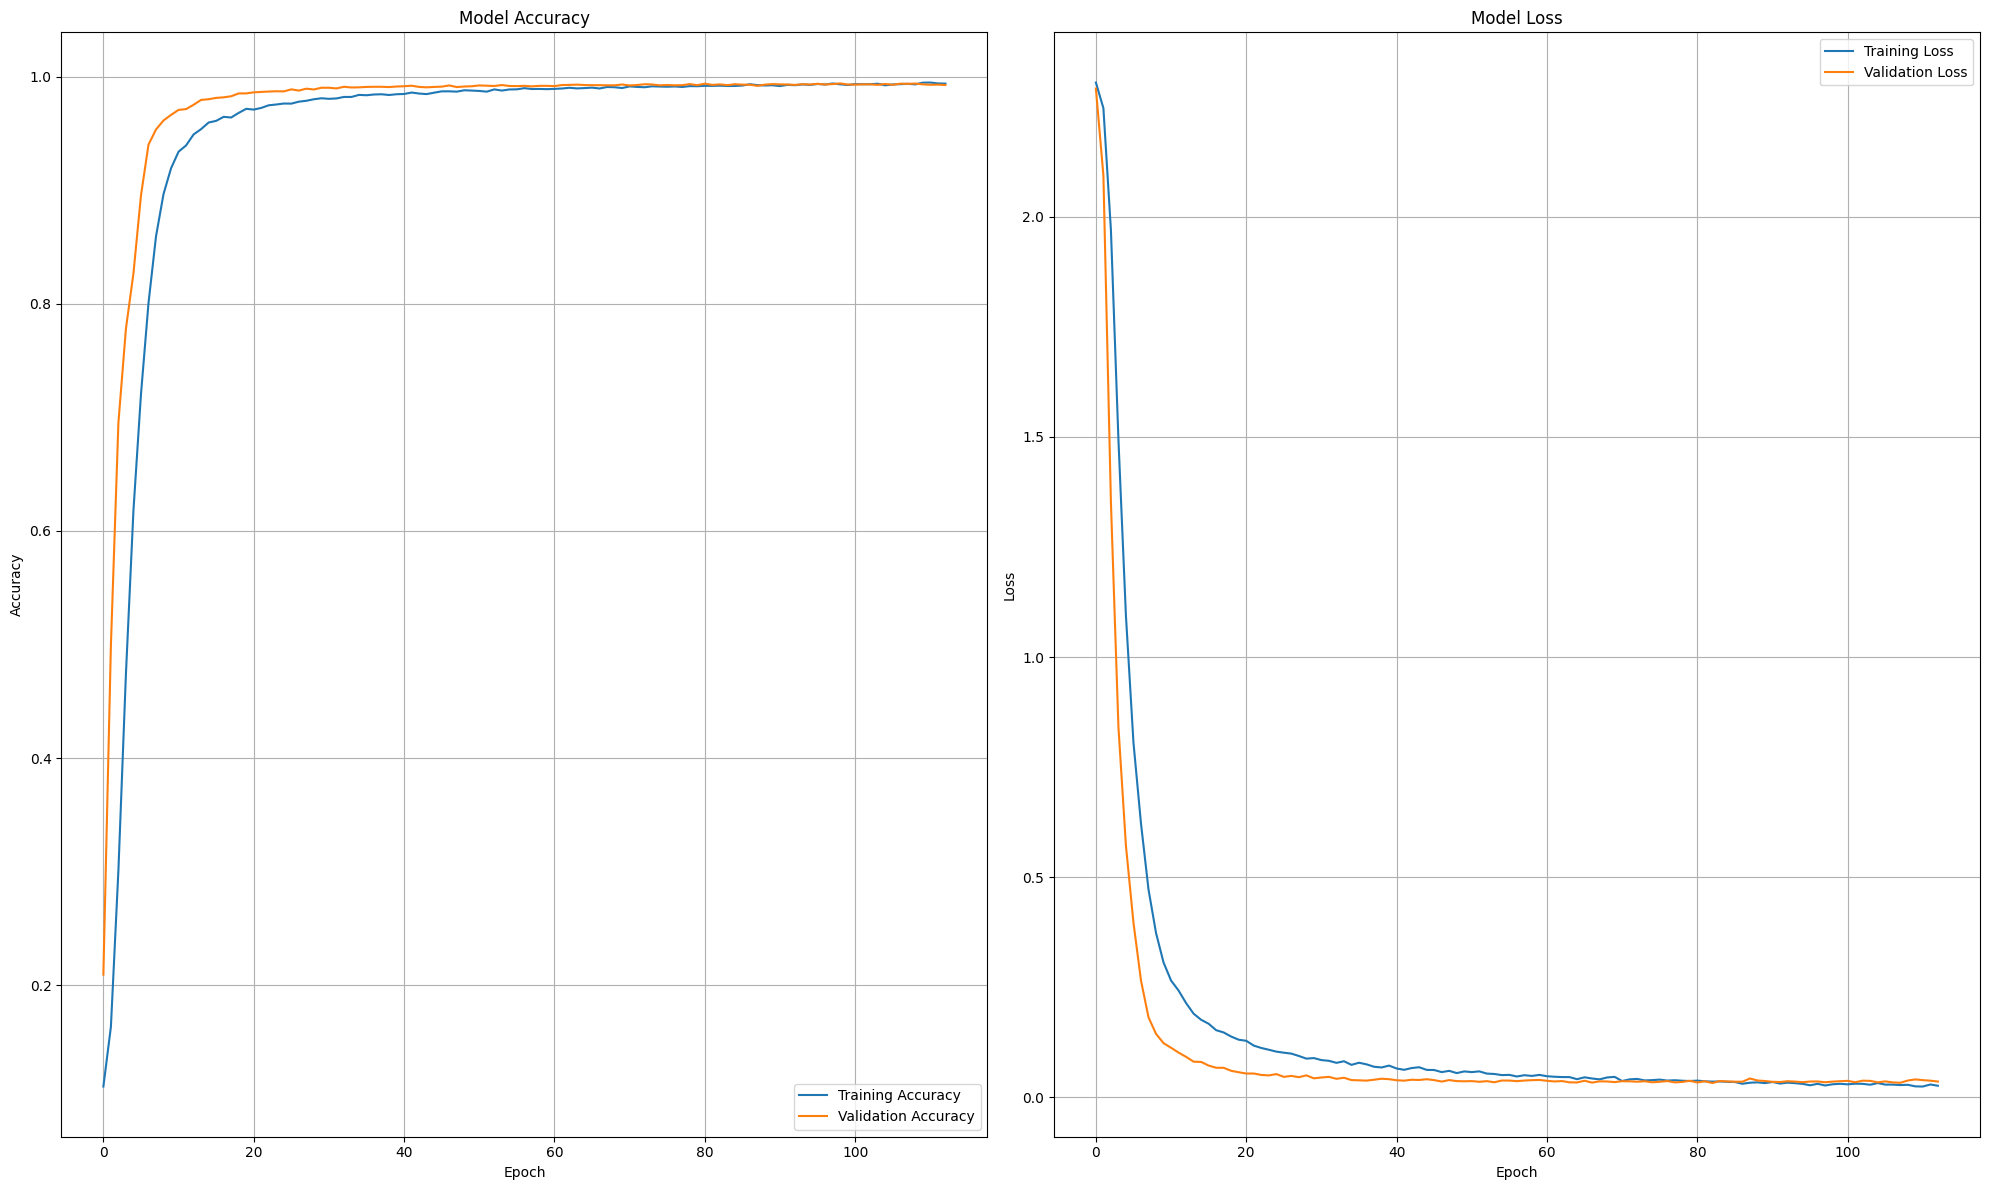

In [ ]:
plot_training_visualisation(history)

In [ ]:
predictions=model.predict(test)
predictions=np.argmax(predictions,axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
submission=pd.DataFrame({'ImageId':np.arange(1,len(predictions)+1),'Label':predictions})
submission.loc[1:10]

,ImageId,Label
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3
10,11,5


In [ ]:
submission.to_csv('submissionfile200.csv',index=False)